### INTRODUCTION

##### In Lagos State, reliable news sources provide critical insights into recurring flood events. This project utilizes regression techniques to forecast and mitigate future floods, leveraging data analytics to enhance prediction accuracy and inform proactive disaster management strategies.







#### LOADING THE DATA

In [116]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [117]:
import pandas as pd
file_path = r'C:\Users\USER\Documents\flood_data.csv'
df = pd.read_csv(file_path)
df.head(10)


,State,Datetime,Tempmax,Tempmin,Temp,Humidity,Precip,Preciprob,Precipcover,Windspeed,Winddir,Sealevelpressure,Cloudcover,Moonphase,FloodEvent,preciptype
0,Lagos,7/10/2002,29.1,25.1,27.2,85.2,0.7,100,4.17,27.7,212.8,1013.8,90.0,0.00,flood,rain
1,Lagos,6/17/2004,28.1,23.1,26.5,86.3,3.0,100,4.17,25.9,237.3,1014.2,90.0,0.00,flood,rain
2,Lagos,7/18/2005,29.1,27.1,27.9,84.2,21.1,100,4.17,33.5,232.9,1012.4,90.0,0.40,flood,rain
3,Lagos,10/11/2008,28.1,23.1,25.4,89.7,18.0,100,8.33,14.8,192.6,1013.5,76.7,0.39,flood,rain
4,Lagos,10/14/2009,27.2,23.1,25.0,91.3,106.9,100,4.17,13.0,240.7,1011.8,79.6,0.86,flood,rain
5,Lagos,7/10/2010,28.0,23.0,25.4,90.5,51.8,100,8.33,35.3,255.1,1014.0,65.1,0.96,flood,rain
6,Lagos,7/10/2011,26.0,22.0,24.2,95.0,1.0,100,4.17,29.5,229.9,1014.2,76.7,0.33,flood,rain
7,Lagos,6/2/2012,26.0,22.4,24.6,95.2,14.0,100,4.17,NaN,NaN,1013.8,70.4,NaN,flood,rain
8,Lagos,7/2/2012,25.6,22.3,23.8,96.1,55.1,100,8.33,NaN,NaN,1013.5,86.7,NaN,flood,rain
9,Lagos,4/21/2014,33.0,22.9,27.9,83.1,4.3,100,29.17,19.8,219.9,1009.7,55.4,0.72,flood,rain


### Checking for Missing Values

In [118]:
print(df.isnull().sum())


# Check the number of duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Verify that duplicates are removed
print("After removing duplicates:")
print(df)


State               0
Datetime            0
Tempmax             0
Tempmin             0
Temp                0
Humidity            0
Precip              0
Preciprob           0
Precipcover         0
Windspeed           2
Winddir             2
Sealevelpressure    0
Cloudcover          0
Moonphase           2
FloodEvent          0
preciptype          0
dtype: int64
Number of duplicate rows: 1
After removing duplicates:
    State    Datetime  Tempmax  Tempmin  Temp  Humidity  Precip  Preciprob  \
0   Lagos   7/10/2002     29.1     25.1  27.2      85.2     0.7        100   
1   Lagos   6/17/2004     28.1     23.1  26.5      86.3     3.0        100   
2   Lagos   7/18/2005     29.1     27.1  27.9      84.2    21.1        100   
3   Lagos  10/11/2008     28.1     23.1  25.4      89.7    18.0        100   
4   Lagos  10/14/2009     27.2     23.1  25.0      91.3   106.9        100   
5   Lagos   7/10/2010     28.0     23.0  25.4      90.5    51.8        100   
6   Lagos   7/10/2011     26.0    

### Cleaning the dataset

In [119]:
df['Winddir'].fillna(df['Winddir'].mode()[0], inplace=True)
df['Windspeed'].fillna(df['Windspeed'].median(), inplace=True)
df['Moonphase'].fillna(df['Moonphase'].mean(), inplace=True)
df.to_csv('cleaned_flood_data_encoded.csv', index=False)
df.head()

,State,Datetime,Tempmax,Tempmin,Temp,Humidity,Precip,Preciprob,Precipcover,Windspeed,Winddir,Sealevelpressure,Cloudcover,Moonphase,FloodEvent,preciptype
0,Lagos,7/10/2002,29.1,25.1,27.2,85.2,0.7,100,4.17,27.7,212.8,1013.8,90.0,0.00,flood,rain
1,Lagos,6/17/2004,28.1,23.1,26.5,86.3,3.0,100,4.17,25.9,237.3,1014.2,90.0,0.00,flood,rain
2,Lagos,7/18/2005,29.1,27.1,27.9,84.2,21.1,100,4.17,33.5,232.9,1012.4,90.0,0.40,flood,rain
3,Lagos,10/11/2008,28.1,23.1,25.4,89.7,18.0,100,8.33,14.8,192.6,1013.5,76.7,0.39,flood,rain
4,Lagos,10/14/2009,27.2,23.1,25.0,91.3,106.9,100,4.17,13.0,240.7,1011.8,79.6,0.86,flood,rain


In [120]:
print(df.isnull().sum())

State               0
Datetime            0
Tempmax             0
Tempmin             0
Temp                0
Humidity            0
Precip              0
Preciprob           0
Precipcover         0
Windspeed           0
Winddir             0
Sealevelpressure    0
Cloudcover          0
Moonphase           0
FloodEvent          0
preciptype          0
dtype: int64


### Explore the data set

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Basic information
print("Basic Information:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Data types
print("\nData Types:")
print(df.dtypes)




Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 0 to 22
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             22 non-null     object 
 1   Datetime          22 non-null     object 
 2   Tempmax           22 non-null     float64
 3   Tempmin           22 non-null     float64
 4   Temp              22 non-null     float64
 5   Humidity          22 non-null     float64
 6   Precip            22 non-null     float64
 7   Preciprob         22 non-null     int64  
 8   Precipcover       22 non-null     float64
 9   Windspeed         22 non-null     float64
 10  Winddir           22 non-null     float64
 11  Sealevelpressure  22 non-null     float64
 12  Cloudcover        22 non-null     float64
 13  Moonphase         22 non-null     float64
 14  FloodEvent        22 non-null     object 
 15  preciptype        22 non-null     object 
dtypes: float64(11), int64(1), object

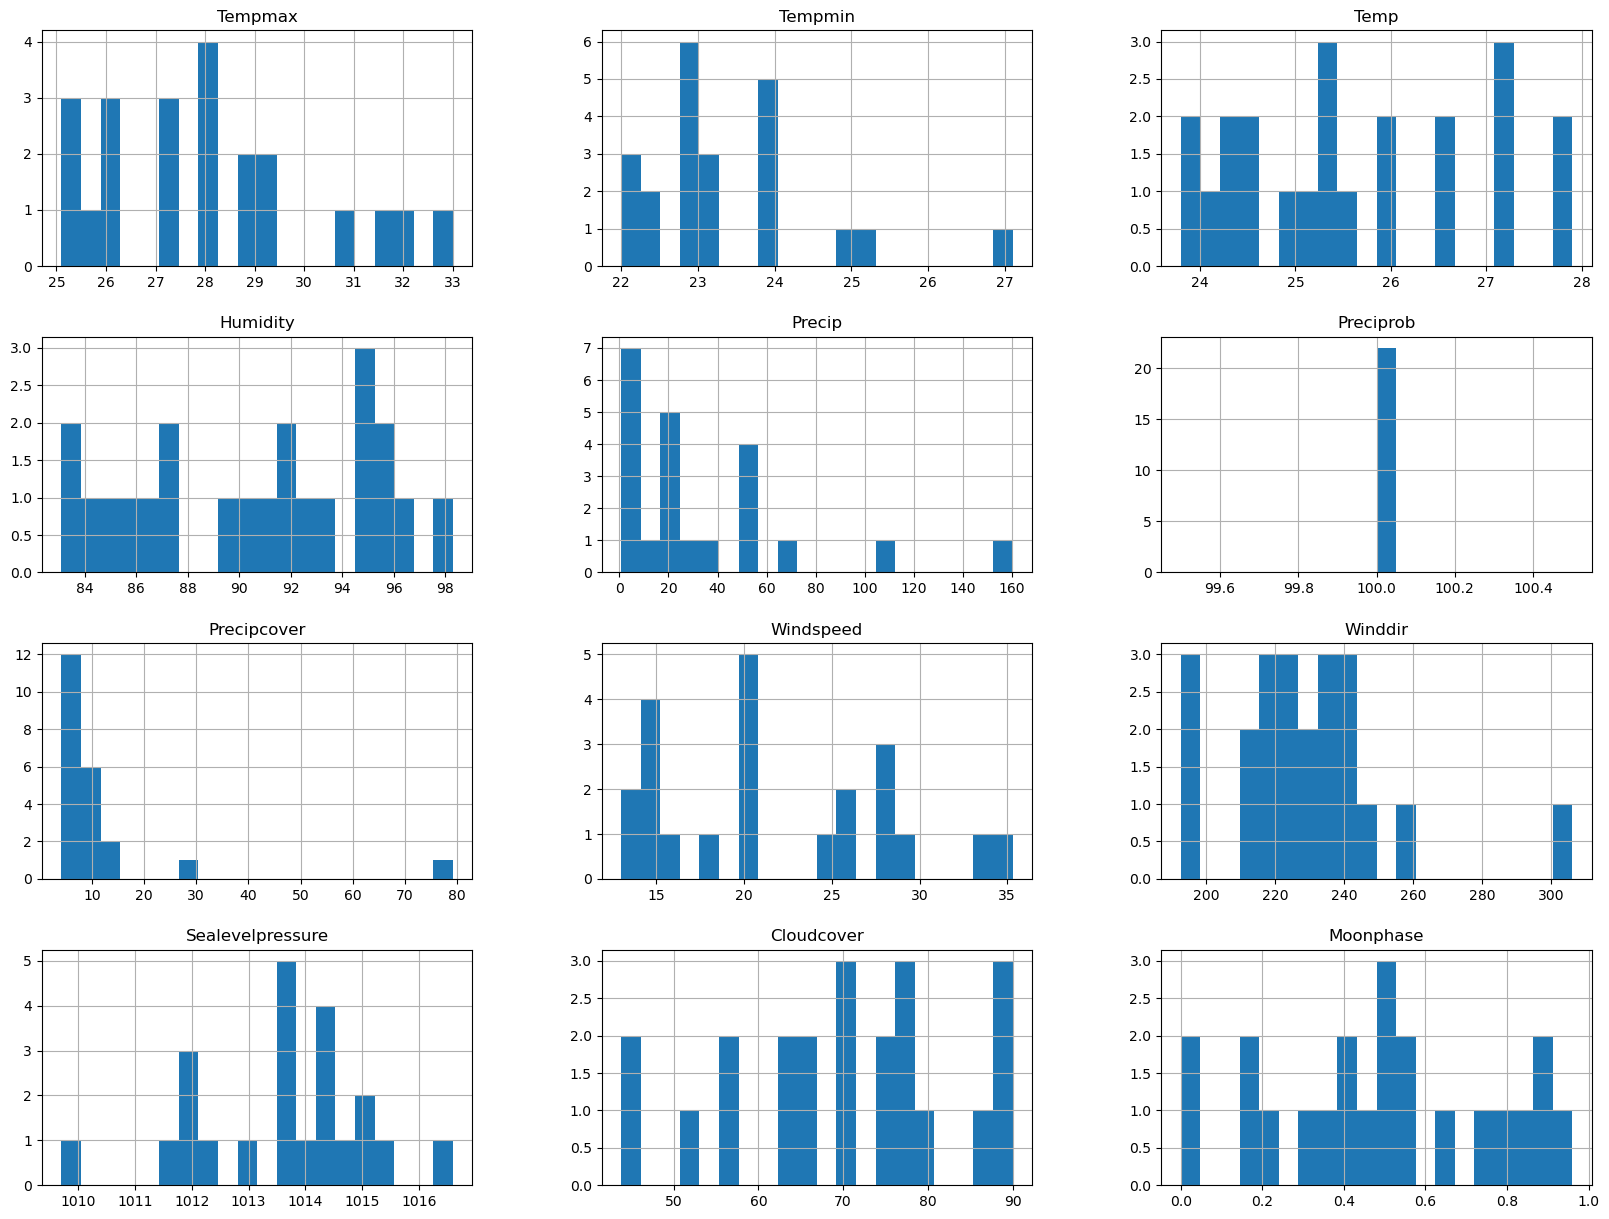

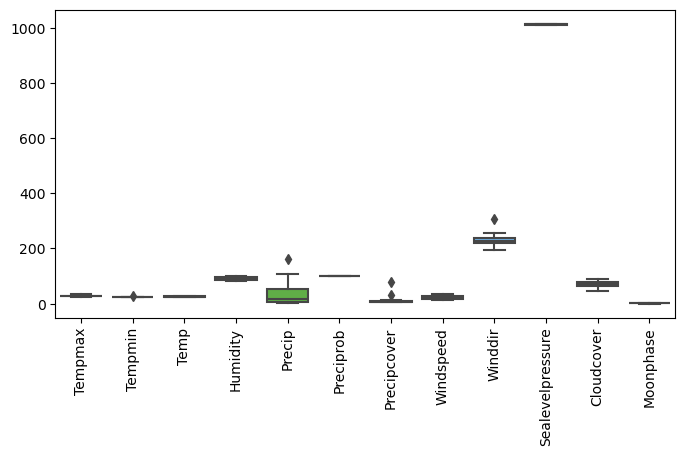

In [122]:
# Histograms for numerical features
df.hist(bins=20, figsize=(20, 15))
plt.show()

# Boxplots for numerical features
plt.figure(figsize=(8, 4))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.show()



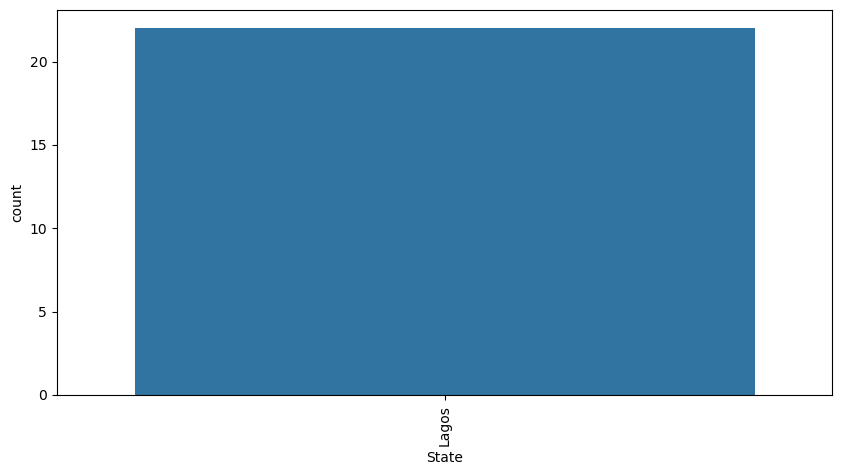

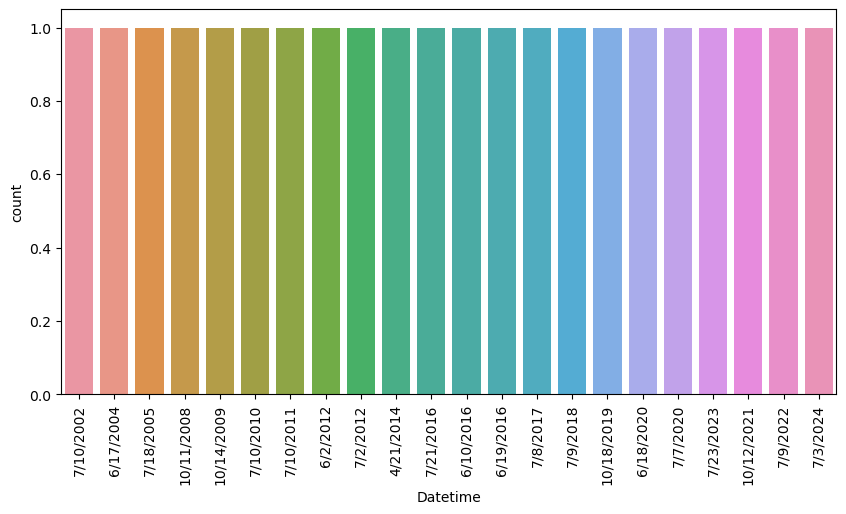

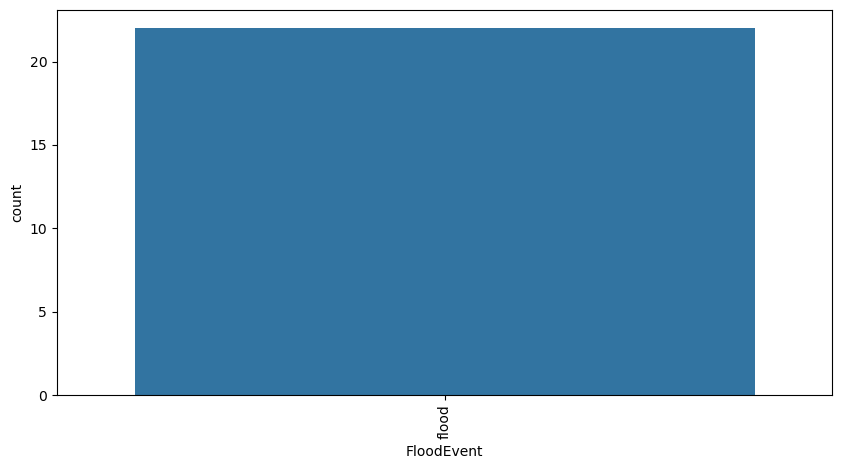

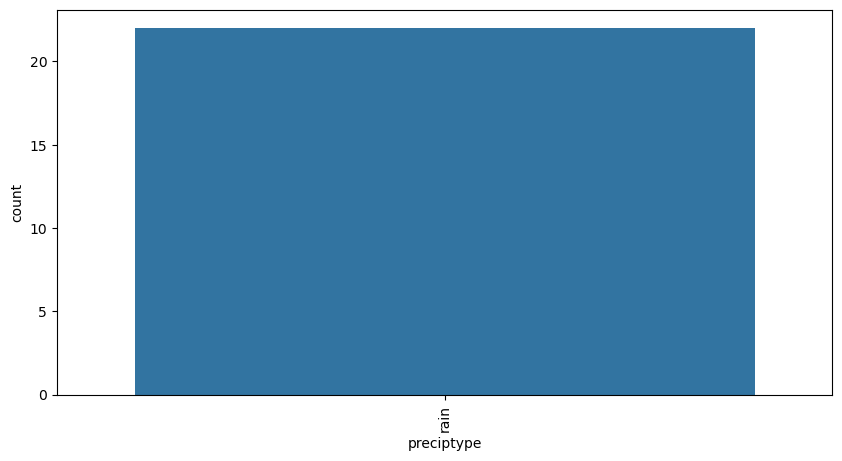

In [123]:
# Count plots for categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature)
    plt.xticks(rotation=90)
    plt.show()



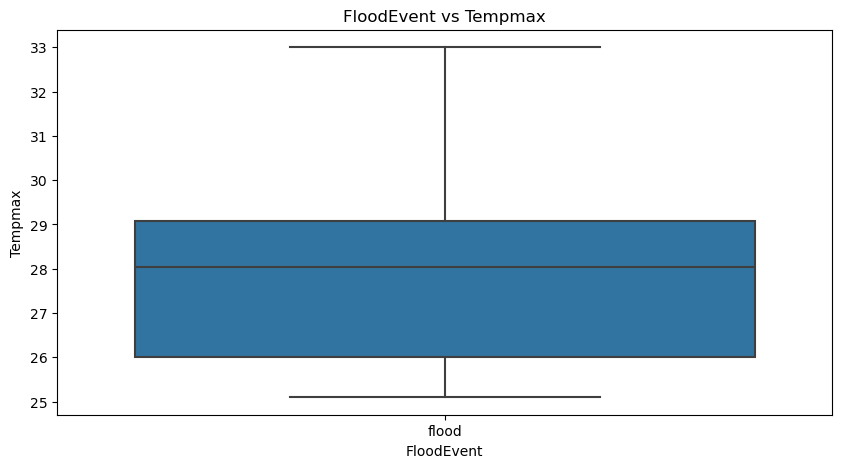

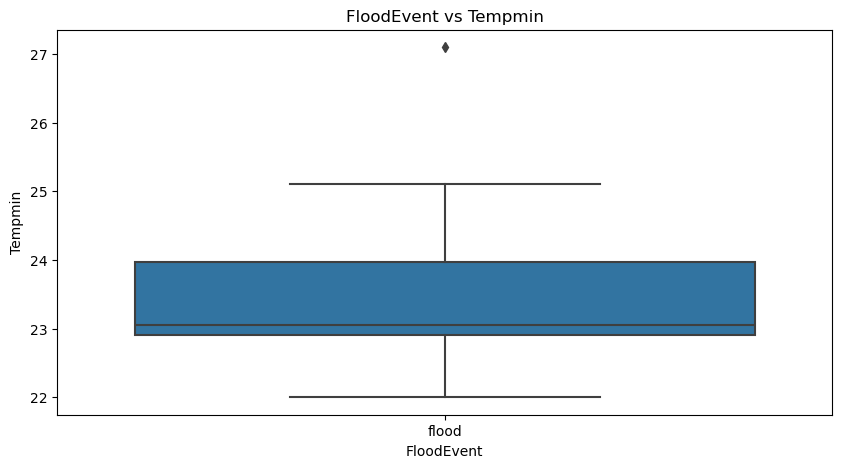

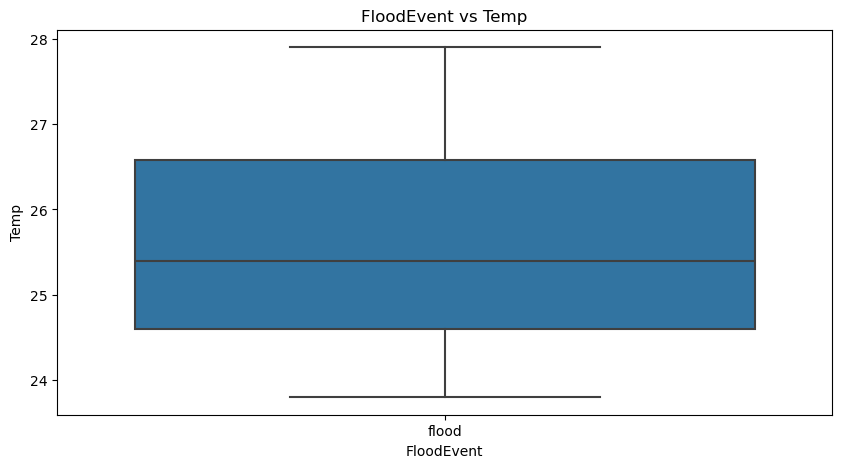

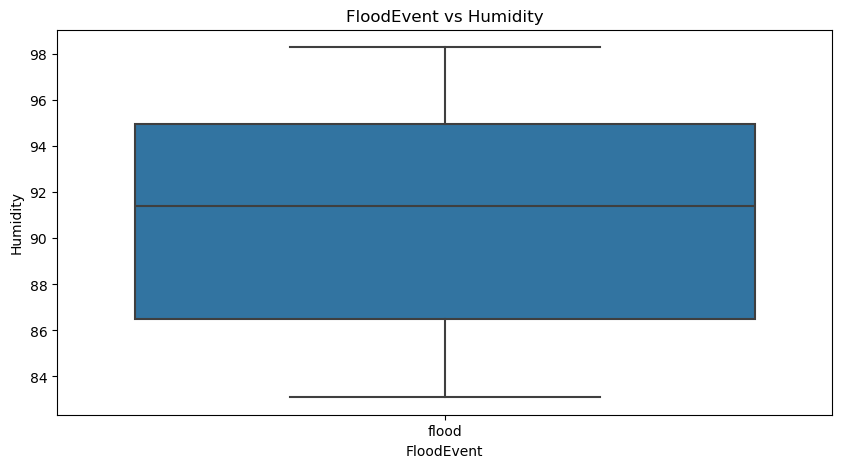

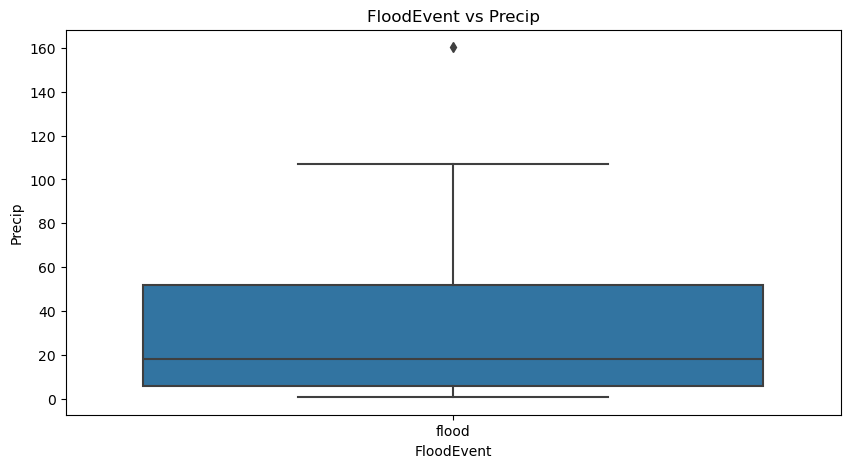

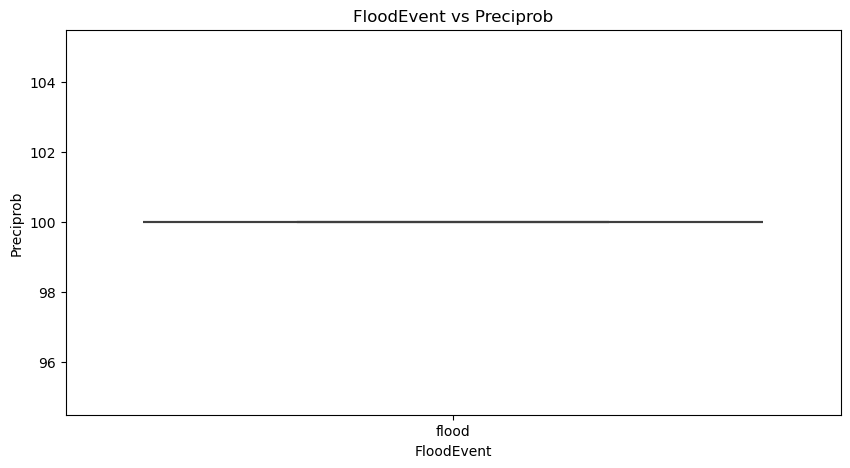

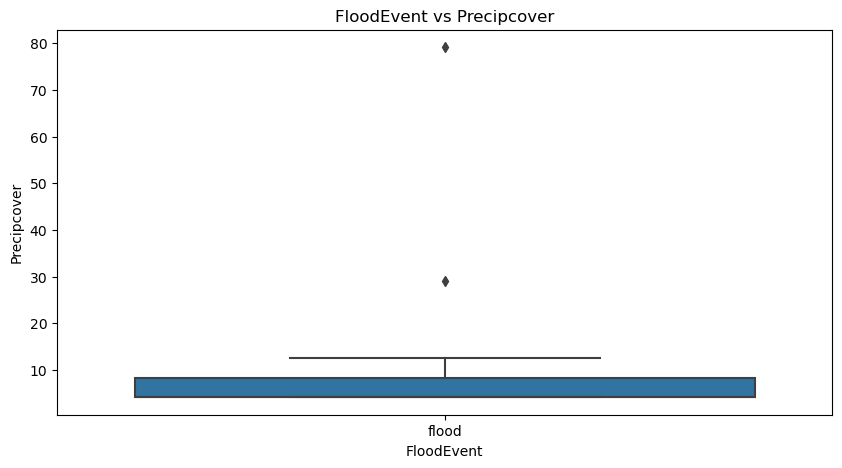

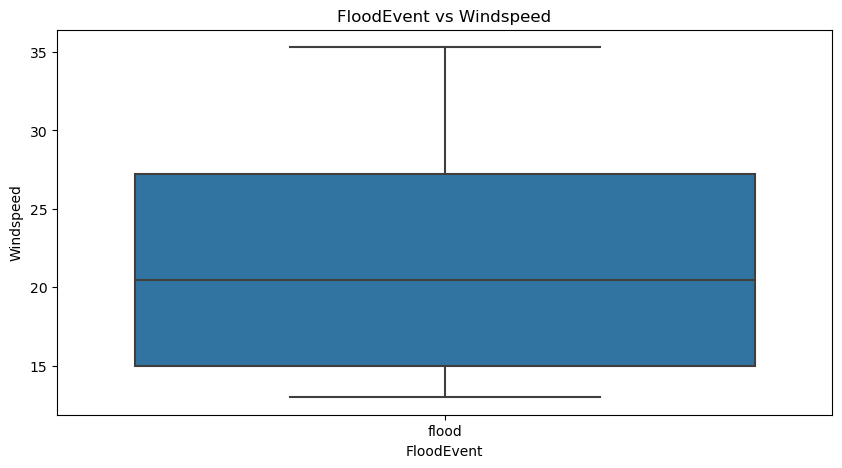

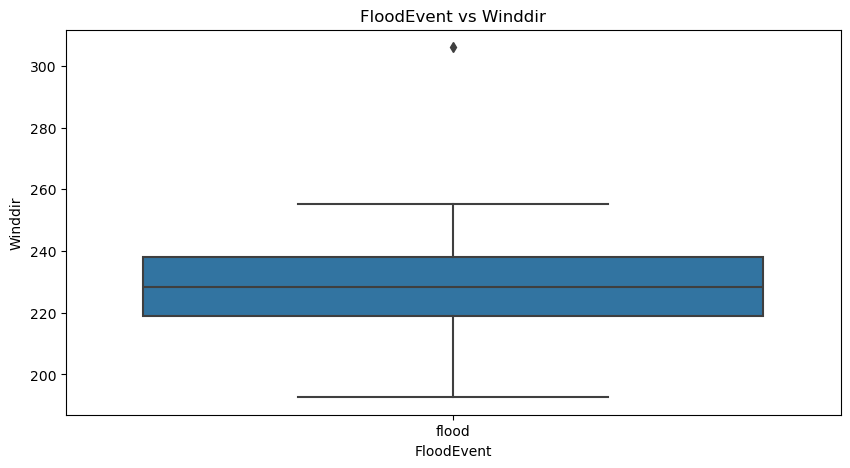

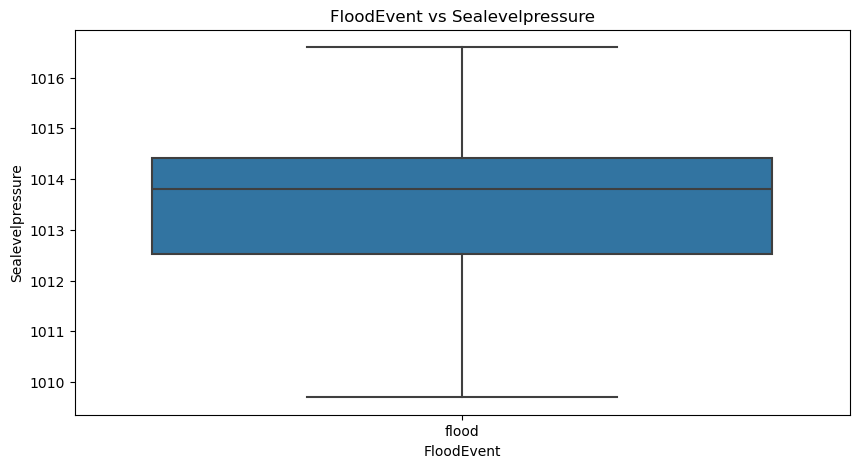

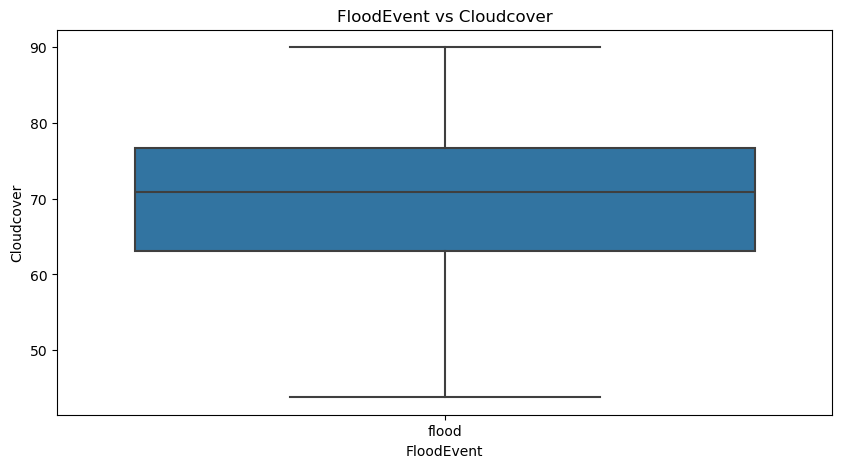

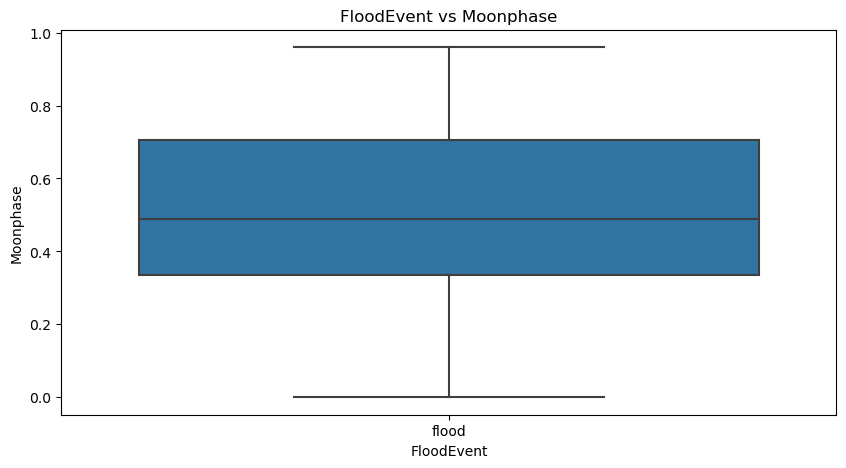

In [124]:
# FloodEvent vs. Numerical Features
for feature in df.select_dtypes(include=['float64', 'int64']).columns:
    if feature != 'FloodEvent':
        plt.figure(figsize=(10, 5))
        sns.boxplot(x='FloodEvent', y=feature, data=df)
        plt.title(f'FloodEvent vs {feature}')
        plt.show()
        

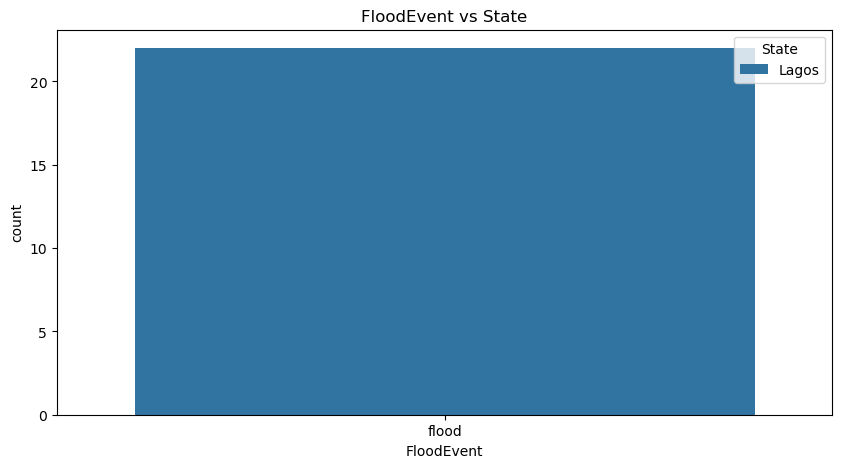

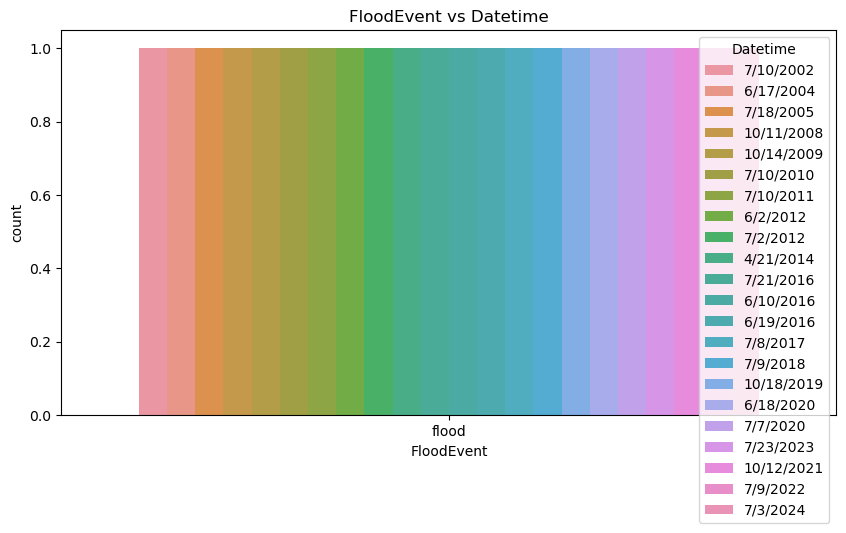

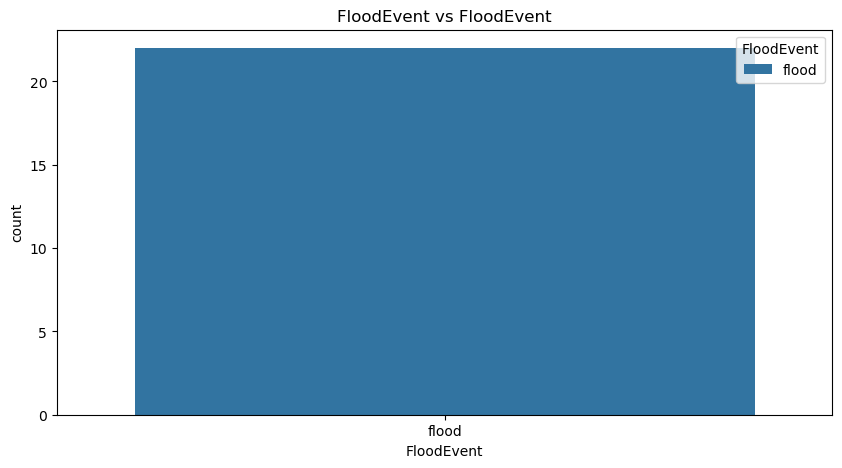

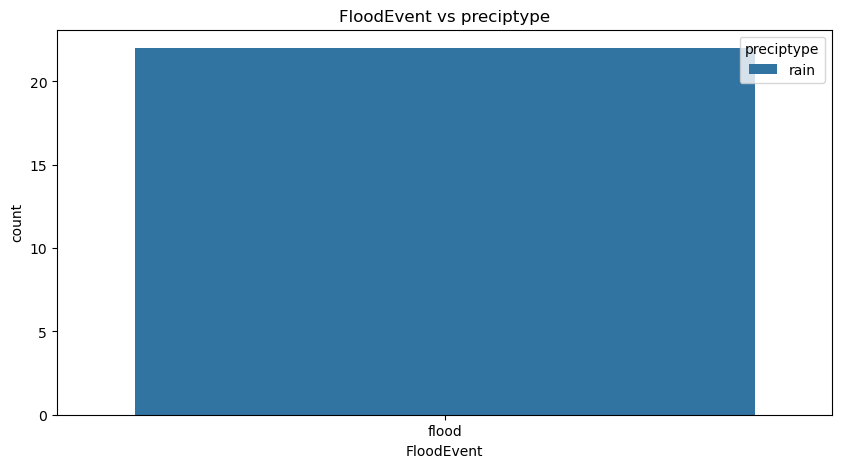

KeyError: "None of ['Date'] are in the columns"

In [125]:

# FloodEvent vs. Categorical Features
for feature in categorical_features:
        plt.figure(figsize=(10, 5))
        sns.countplot(x='FloodEvent', hue=feature, data=df)
        plt.title(f'FloodEvent vs {feature}')
        plt.show()

# Time series analysis
# Plot Flood Events over time
df.set_index('Date', inplace=True)
df['FloodEvent'].resample('M').sum().plot(figsize=(15, 6))
plt.title('Monthly Flood Events')
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import mstats


# List of numerical columns to apply Winsorization
numerical_columns = ['Tempmax', 'Tempmin', 'Temp', 'Humidity', 'Precip', 'Preciprob',
                     'Precipcover', 'Windspeed', 'Winddir', 'Sealevelpressure',
                     'Cloudcover', 'Moonphase']

# Apply Winsorization to handle outliers in each numerical column
for col in numerical_columns:
    df[col] = mstats.winsorize(df[col], limits=[0.01, 0.01])

# Verify the updated DataFrame
print(df.head())  # Print the first few rows to verify changes

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming df and preprocessing steps are defined as in your example

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Clip predictions to the min and max of the original ordinal dates
y_pred_clipped = np.clip(y_pred, y.min(), y.max())

# Convert ordinal dates back to datetime format
y_pred_dates = pd.to_datetime(y_pred_clipped, origin='unix')
y_test_dates = pd.to_datetime(y_test.values, origin='unix')

# Evaluate the model
plt.figure(figsize=(12, 6))
plt.plot(y_test_dates, y_pred_dates, 'o')
plt.xlabel('Actual Flood Datetime')
plt.ylabel('Predicted Flood Datetime')
plt.title('Actual vs Predicted Flood Datetime')
plt.show()

# Predict the next flood datetime using the last known data point
last_known_data = X_scaled[-1].reshape(1, -1)
next_flood_ordinal = model.predict(last_known_data)
next_flood_ordinal_clipped = np.clip(next_flood_ordinal, y.min(), y.max())
next_flood_datetime = pd.to_datetime(next_flood_ordinal_clipped[0], origin='unix')

print(f"The predicted next flood datetime is: {next_flood_datetime}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming df and preprocessing steps are defined as in your example

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Clip predictions to the min and max of the original ordinal dates
y_pred_clipped = np.clip(y_pred, y.min(), y.max())

# Convert ordinal dates back to datetime format
y_pred_dates = pd.to_datetime([pd.Timestamp('0001-01-01').toordinal() + int(np.round(d)) for d in y_pred_clipped])
y_test_dates = pd.to_datetime([pd.Timestamp('0001-01-01').toordinal() + d for d in y_test.values])

# Evaluate the model
plt.figure(figsize=(12, 6))
plt.plot(y_test_dates, y_pred_dates, 'o')
plt.xlabel('Actual Flood Datetime')
plt.ylabel('Predicted Flood Datetime')
plt.title('Actual vs Predicted Flood Datetime')
plt.show()

# Predict the next flood datetime using the last known data point
last_known_data = X_scaled[-1].reshape(1, -1)
next_flood_ordinal = model.predict(last_known_data)

# Ensure next_flood_ordinal is clipped within the range
next_flood_ordinal_clipped = np.clip(next_flood_ordinal, y.min(), y.max())

# Convert clipped ordinal date back to datetime format
next_flood_datetime = pd.Timestamp('0001-01-01').toordinal() + int(np.round(next_flood_ordinal_clipped[0]))

print(f"The predicted next flood datetime is: {pd.to_datetime(next_flood_datetime)}")
